In [2]:
#imports
import matplotlib.pyplot as plt
import networkx as nx
from igraph import *
from tkinter import *
from functools import partial
import numpy as np

In [55]:
nodes = []
edges = []

def first_screen():
    graph_main_info = Tk() 
    graph_main_info.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    graph_main_info.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_secondary_title = Label (graph_main_info, text="Simulação", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    lb_node = Label(graph_main_info, text="Número de nós:", bg="white").place(x=110, y=130)
    lb_edge = Label(graph_main_info, text="Número de enlaces:", bg="white").place(x=110, y=180)
    
    node_qnt_input = Entry(graph_main_info, width=30, bg="white")
    node_qnt_input.place(x=110, y=150)
    
    edge_qnt_input = Entry(graph_main_info, width=30, bg="white")
    edge_qnt_input.place(x=110, y=200)
    
    bt_confirm = Button(graph_main_info, width=10, bg="white", text="Confirmar", command=partial(second_screen_transition, graph_main_info, node_qnt_input, edge_qnt_input)).place(x=275, y=230)
    graph_main_info.mainloop()

def second_screen_transition(previous_screen, node_qnt, edge_qnt):
    second_screen(previous_screen, int(node_qnt.get()), int(edge_qnt.get()))
    
def second_screen(previous_screen, node_qnt, edge_qnt):
    graph_specs = Tk() #criacao de uma janela - instancia de Tk
    graph_specs.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    graph_specs.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_secondary_title = Label (graph_specs, text="Simulação Parte 2", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    
    dist_vector = []
    lb_A_vector = []
    lb_B_vector = []

    for i in range(1, int(edge_qnt) + 1):
        dist_input = Entry(graph_specs, width=30, bg="white")
        dist_input.place(x=110, y=20*i + 150)
        dist_vector.append(dist_input)
        
        lb_A_input = Entry(graph_specs, width=30, bg="white")
        lb_A_input.place(x=310, y=20*i + 150)
        lb_A_vector.append(lb_A_input)
        
        lb_B_input = Entry(graph_specs, width=30, bg="white")
        lb_B_input.place(x=510, y=20*i + 150)
        lb_B_vector.append(lb_B_input)
        
    bt_confirm = Button (graph_specs, width=20, text="Cadastrar", command = partial(process_graph_info, graph_specs, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector), bg="white").pack() #criando botao "cadastrar"
    previous_screen.destroy()
    
def process_graph_info(previous_screen, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector):
    processed_labels = []
    processed_dists = []
    
#     for i in range(len(lb_A_vector))
    
    for d in dist_vector:
        processed_dists.append(int(d.get()))
        
    processed_labels.append([lb.get() for lb in lb_A_vector])
    processed_labels.append([lb.get() for lb in lb_B_vector])
        
    processed_labels = np.unique(processed_labels)
    
    newtwork = Graph(node_qnt)
#     newtwork.vs["label"] = processed_labels
    newtwork.es["weight"] = processed_dists
    
    ascii_default_value = ord('a')
    for i in range(edge_qnt):
        u = ord(lb_A_vector[i].get()) - ascii_default_value
        v = ord(lb_B_vector[i].get()) - ascii_default_value
        w = processed_dists[i
                           ]
        newtwork.add_edge(u, v)
        print(u, v, '-------')
        edges.append((u, v, w))
    
    print(newtwork)
    print(edges)
    create_graph(node_qnt)

#     shortestPaths = newtwork.get_shortest_paths("a",to="c",mode=OUT,output="vpath")
#     print(shortestPaths)

#     [newtwork.vs[i]["label"] for i in shortestPaths]
    
    previous_screen.destroy()
    
def create_graph(node_qnt):
    G = nx.Graph()
    
    for i in range(1, node_qnt):
        G.add_node(i)
    
    for e in edges:
        G.add_edge(e[0], e[1], weight = e[2])
    
    pos=nx.spring_layout(G)
    nx.draw(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

0 1 -------
1 2 -------
2 0 -------
IGRAPH U-W- 3 3 --
+ attr: weight (e)
+ edges:
0--1 1--2 0--2
[(0, 1, 1), (1, 2, 2), (2, 0, 3)]


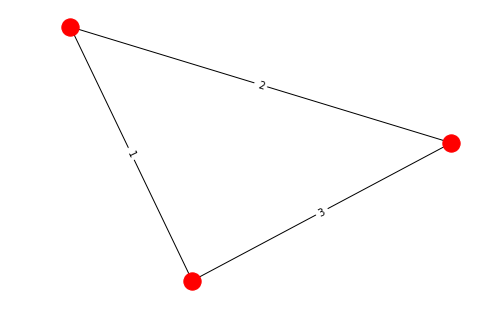

In [56]:
if __name__ == "__main__":

    first_screen()
    

In [30]:
g = Graph(9)

g.add_edge(0,1)
g.add_edges([(0,2),(0,3),(1,2),(1,4),(2,5),(3,5),(3,6),(4,5),(4,8),
(5,6),(5,7),(6,7),(7,8)])

# g.vs["label"]=["Sydney","Melbourne","Canberra","Brisbane","Adelaide", "Alice Springs","Cairns","Darwin","Perth"]

g.es["weight"]=[12, 4, 9, 6, 1, 8, 15, 31, 22, 8, 15, 32,
24, 15, 30, 48]

print(g)

shortestPaths=g.get_shortest_paths(0,weights=g.es["weight"],output="vpath")[1:]
print(shortestPaths)

[g.vs[i]["label"] for i in shortestPaths]

IGRAPH U-W- 9 14 --
+ attr: label (v), weight (e)
+ edges:
0 -- 1 2 3       2 -- 0 1 5       4 -- 1 5 8       6 -- 3 5 7       8 -- 4 7
1 -- 0 2 4       3 -- 0 5 6       5 -- 2 3 4 6 7   7 -- 5 6 8
[[0, 2, 1], [0, 2], [0, 3], [0, 2, 1, 4], [0, 2, 5], [0, 2, 5, 6], [0, 2, 1, 4, 8, 7], [0, 2, 1, 4, 8]]


[['Sydney', 'Canberra', 'Melbourne'],
 ['Sydney', 'Canberra'],
 ['Sydney', 'Brisbane'],
 ['Sydney', 'Canberra', 'Melbourne', 'Adelaide'],
 ['Sydney', 'Canberra', 'Alice Springs'],
 ['Sydney', 'Canberra', 'Alice Springs', 'Cairns'],
 ['Sydney', 'Canberra', 'Melbourne', 'Adelaide', 'Perth', 'Darwin'],
 ['Sydney', 'Canberra', 'Melbourne', 'Adelaide', 'Perth']]

{(1, 2): Text(0.0227328,-0.356465,'0.5'), (1, 3): Text(-0.0319414,0.5,'9.8')}

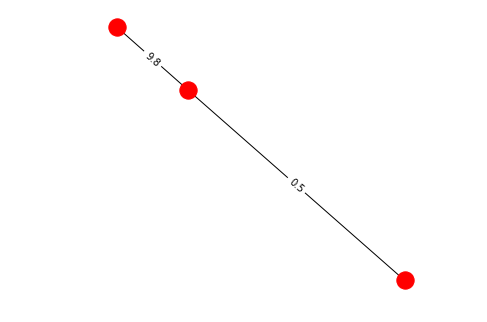

In [52]:
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.spring_layout(G)
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# plt.savefig(<wherever>)


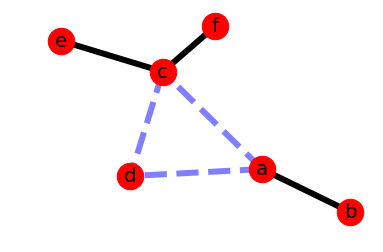

In [50]:
G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display